**BANK LOAN**

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

**LOADING THE DATA**

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

**EXPLORATORY DATA ANALYSIS**

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  On

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.value_counts()

ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
1     25   1           49      91107     4       1.6    1          0         0              1                   0           0       0             1
3331  34   9           32      95054     4       1.1    3          0         0              0                   0           1       0             1
3338  59   29          61      92008     3       2.0    3          0         0              0                   0           1       0             1
3337  60   34          11      94305     4       0.7    3          0         0              0                   0           1       0             1
3336  35   10          118     92069     2       7.8    1          358       0              0                   0           0       0             1
                                                                                                                     

**VISUALIZATION**

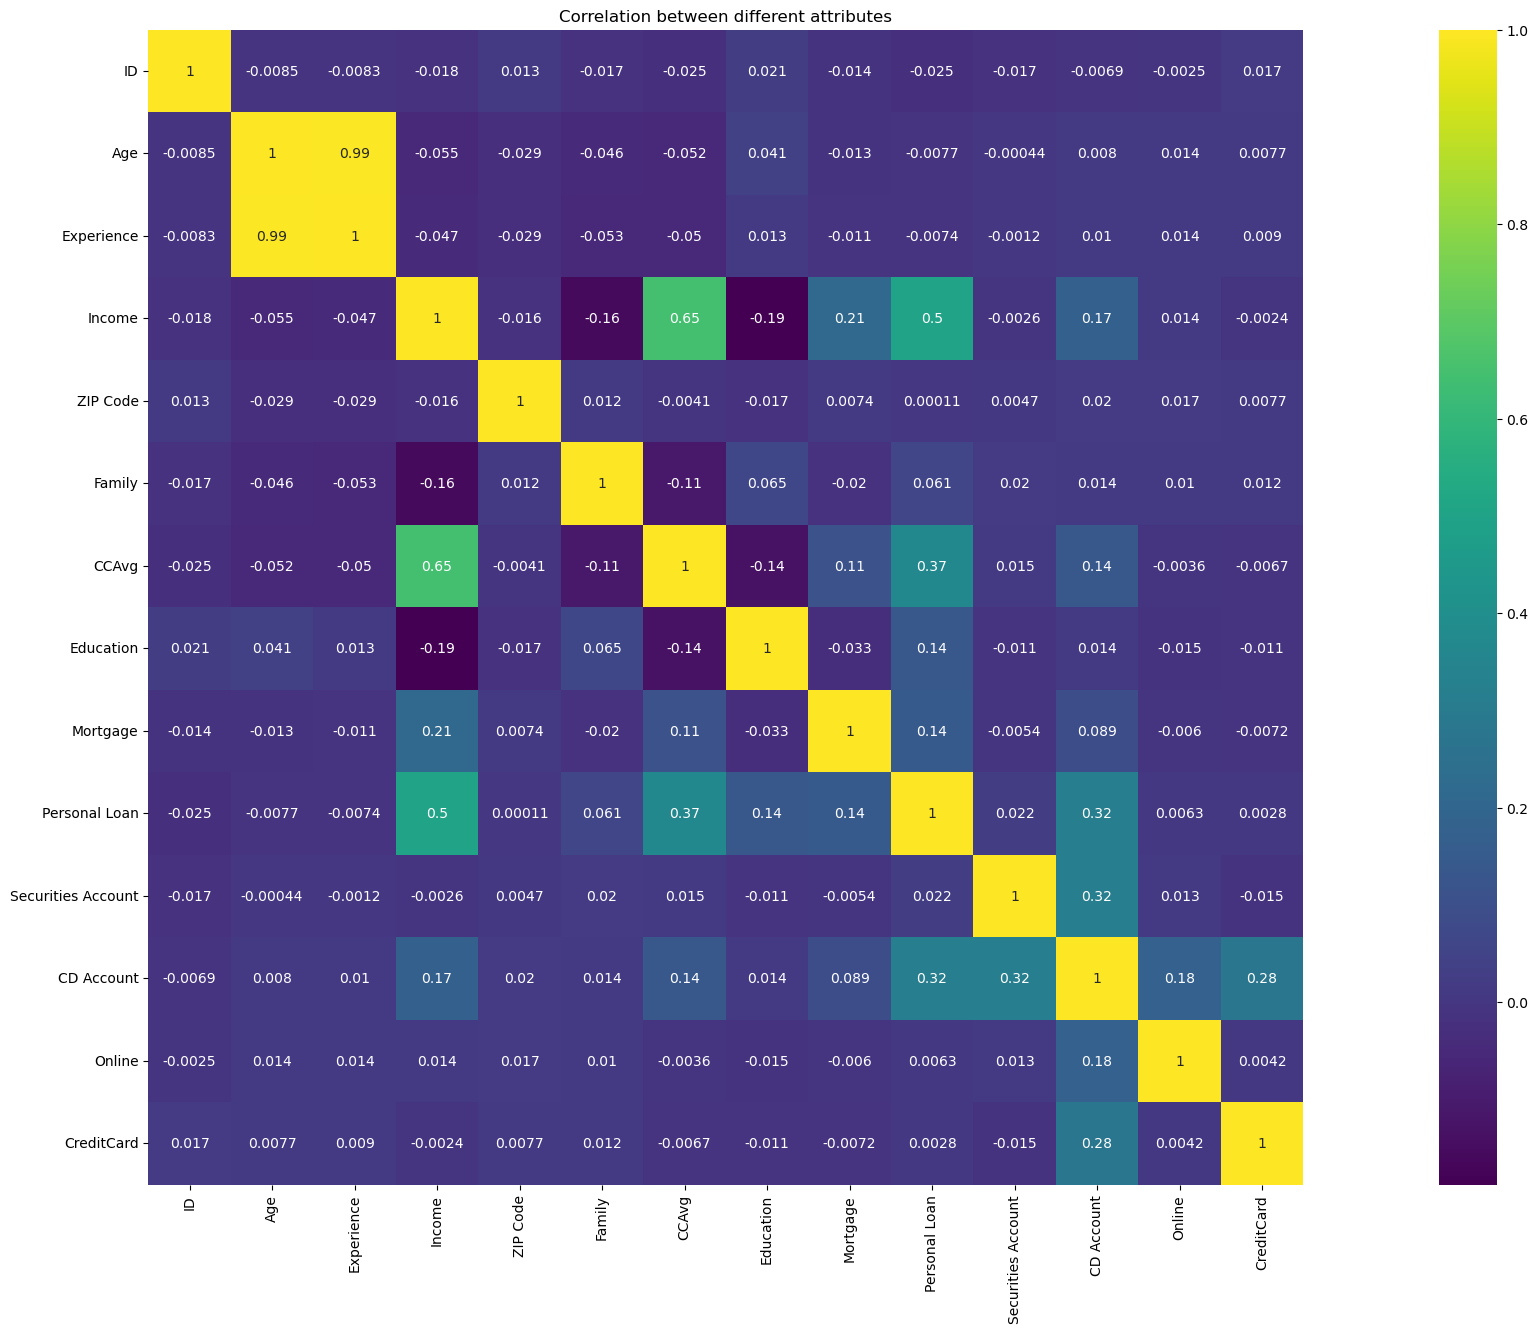

In [9]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [10]:
df = df.drop(['CCAvg','Income','CD Account','Education','Mortgage'],axis=1)

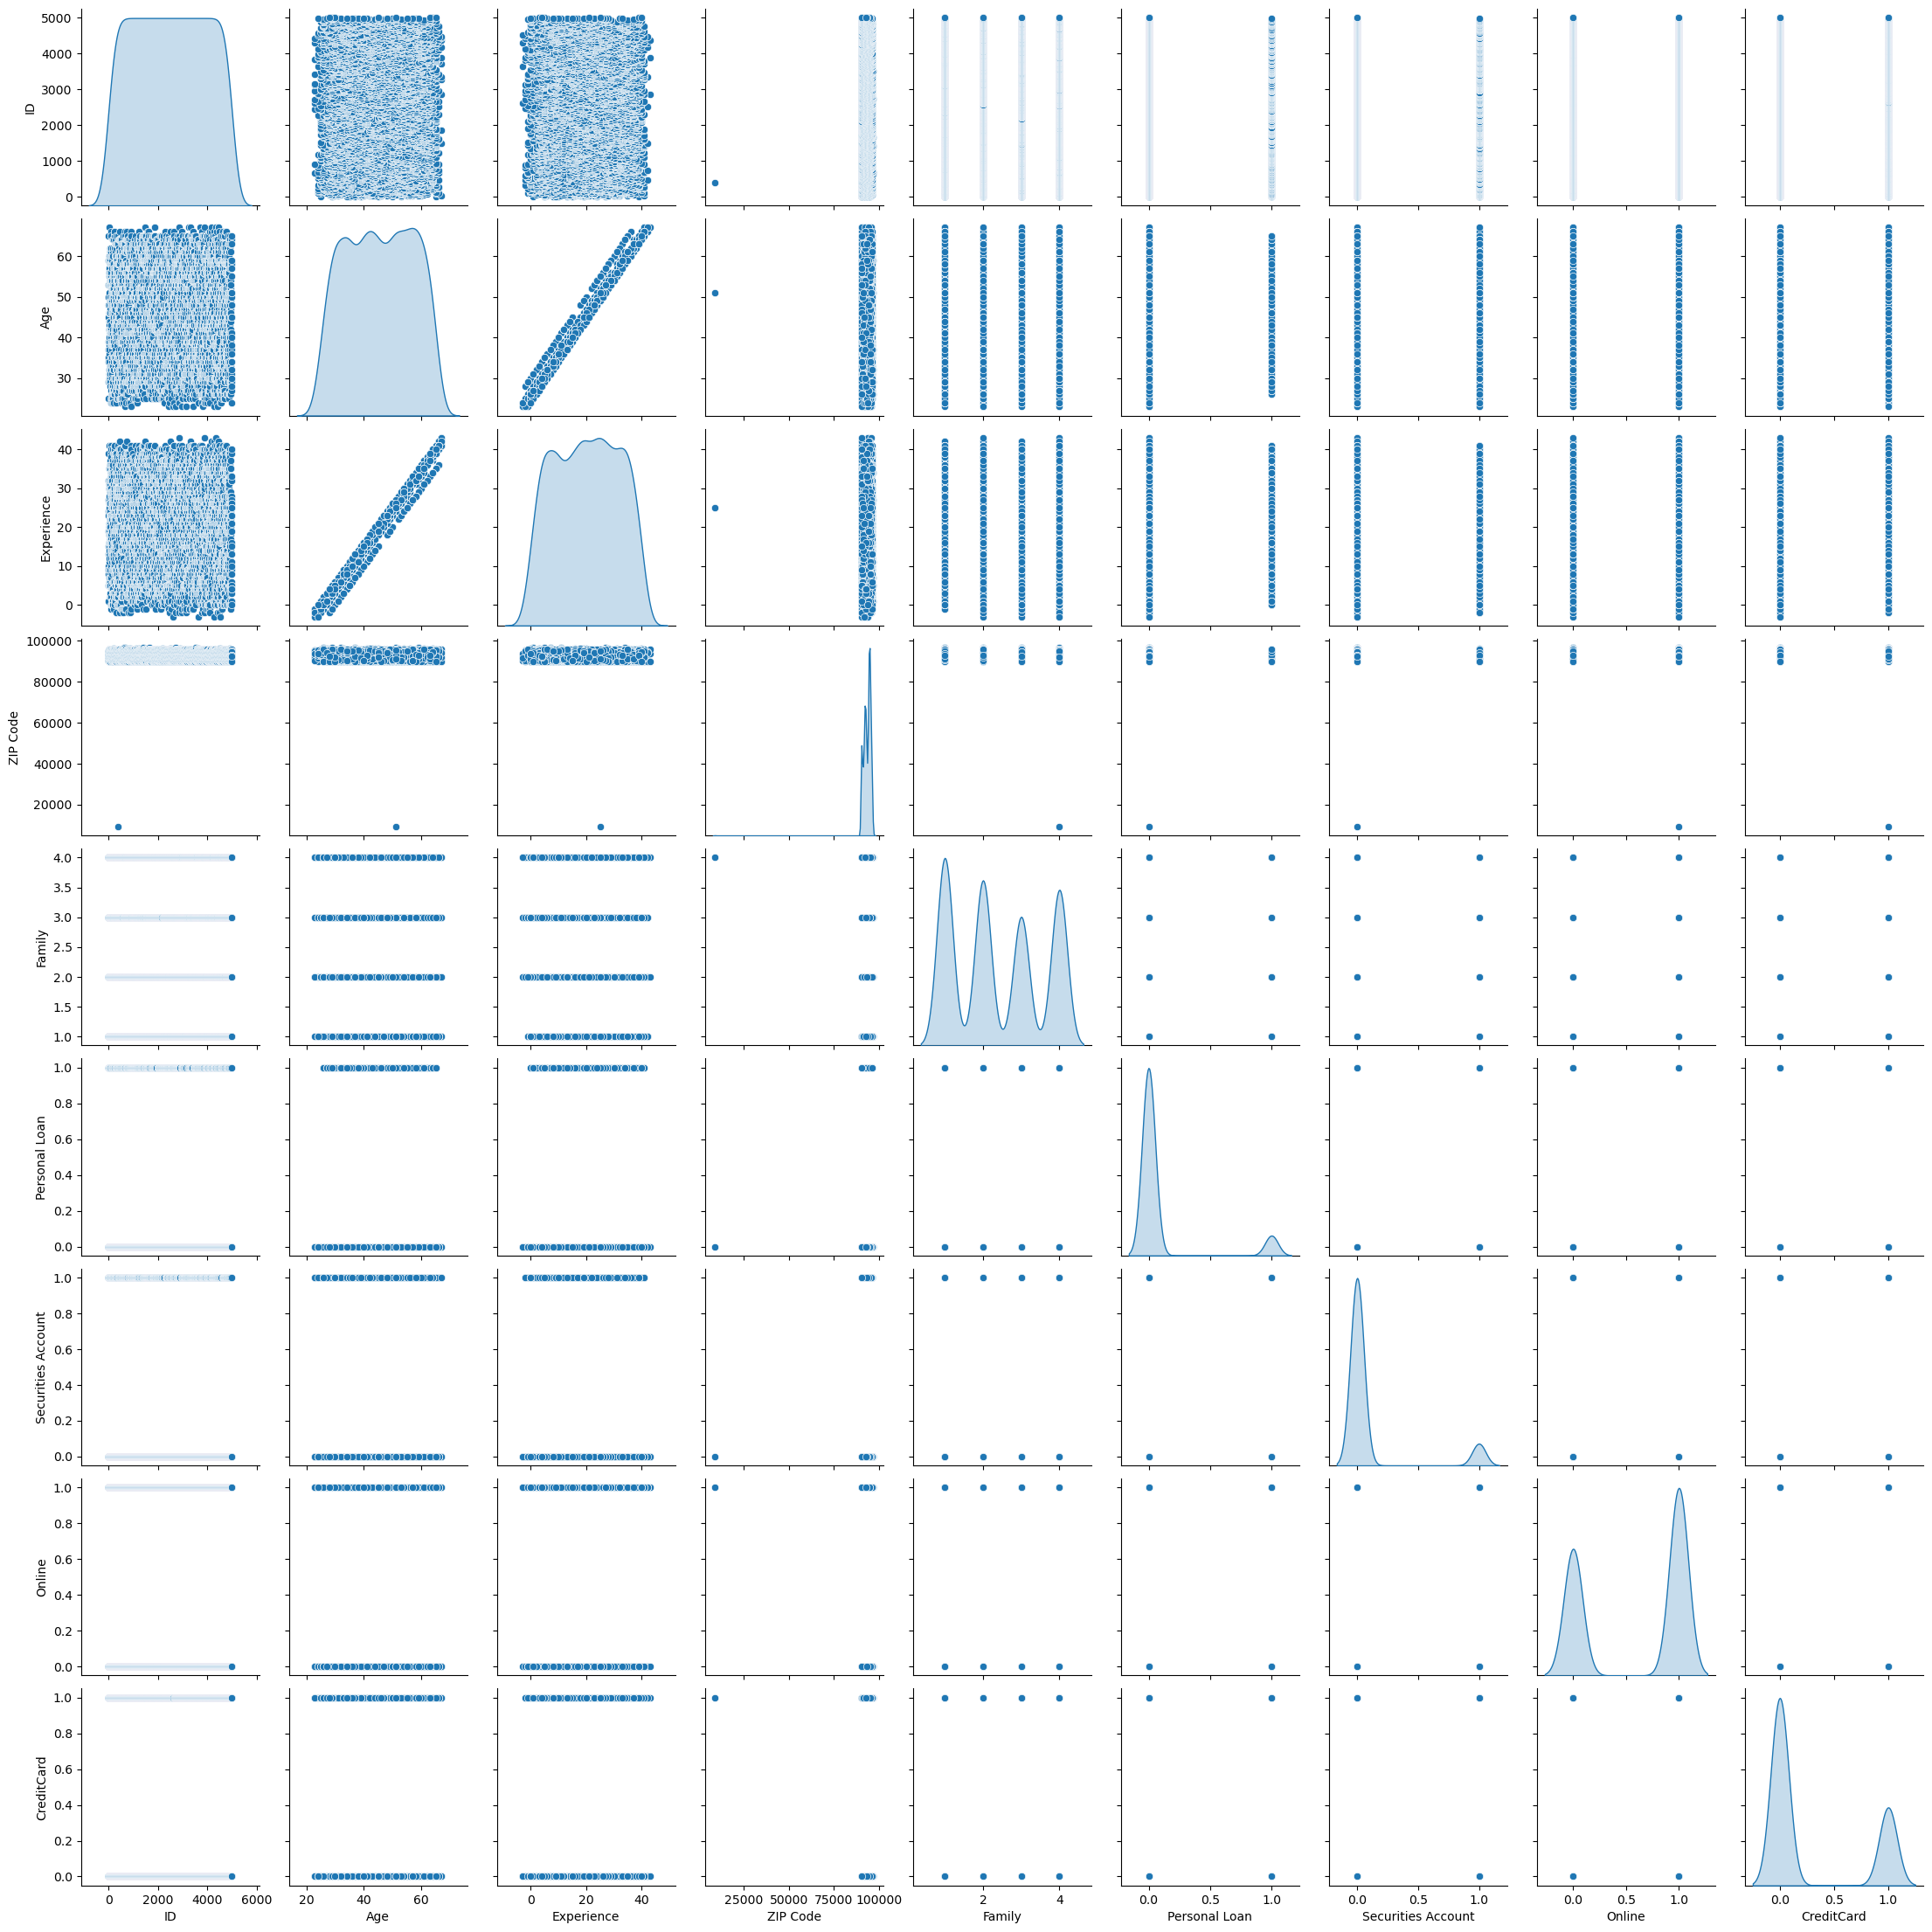

In [11]:
sns.pairplot(df,diag_kind='kde')

**SPLITTING THE DATA**

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop('Personal Loan',axis =1)
y = df['Personal Loan']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**MODEL BUILDING**

In [13]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn import metrics 

print("Model accuracy :{0:.4f}".format(metrics.accuracy_score(y_test,y_pred)))

Model accuracy :0.9007


Confusion Matrix


<Axes: >

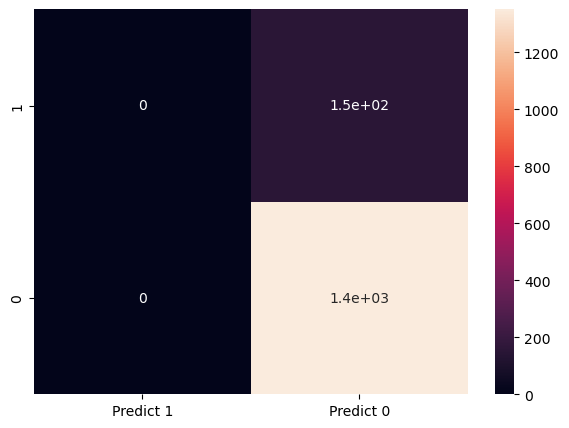

In [16]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])

df_cm = pd.DataFrame(cm,index=[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)